# P5 : Catégorisez automatiquement des questions - Nettoyage et exploration des données (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from bs4 import BeautifulSoup
from collections import Counter as count
import matplotlib.pylab as plt
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
import gensim.corpora as corpora
from math import log
import string

C:\Users\n_a_e\anaconda3\envs\IML-P5\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\n_a_e\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Importation et format des données 

In [2]:
data = pd.read_csv('QueryResults.csv')

In [3]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,vuetify icon not showing,<p>I am using <code>vue.js</code> and <code>vu...,<vue.js><icons><vuetify.js>,57053728,61,75796,7,13
1,How do you format an unsigned long long int us...,<pre><code>#include &lt;stdio.h&gt;\nint main(...,<c><syntax><printf><format-specifiers><long-long>,2844,435,903181,80,13
2,Choosing a static code analysis tool,<p>I'm working on a project where I'm coding i...,<c><unix><testing>,2873,69,56288,20,15
3,Text Editor For Linux (Besides Vi)?,<p>Let me preface this question by saying I us...,<linux><editor>,2898,51,129750,19,34
4,"Python ""SyntaxError: Non-ASCII character '\xe2...",<p>I am writing some python code and I am rece...,<python>,21639275,210,346901,44,23


In [4]:
data.tail()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
43074,Algorithm for ordering data so that neighbor e...,<p>I have a (potentially large) list <code>dat...,<python><algorithm><optimization><time-complex...,71886600,46,2509,10,11
43075,"Heroku and GitHub: ""Items could not be retriev...",<p>I simply want to connect to my GitHub accou...,<github><heroku>,71892543,259,93203,49,12
43076,"Fatal error ""unsafe repository ('/home/repon' ...",<p>I found an error log from Apache 2 that is ...,<git><cve-2022-24765>,71901632,158,105807,34,22
43077,Is there any practical use for a function that...,<p>Would there be any use for a function that ...,<c><function>,72349941,79,10068,8,13
43078,"Message ""npm WARN config global `--global`, `-...","<p>I already installed Node.js on my machine, ...",<npm><warnings>,72401421,231,305423,67,21


In [5]:
data.sample(20)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
16709,How to draw a rounded rectangle using HTML Can...,<p>HTML Canvas provides methods for drawing re...,<html><canvas>,1255512,188,198029,56,15
17568,Check if an element's content is overflowing?,<p>What's the easiest way to detect if an elem...,<javascript><css><overflow>,9333379,231,227702,74,15
20946,XSS filtering function in PHP,<p>Does anyone know of a good function out the...,<php><filter><xss>,1336776,47,114807,32,11
26672,Why is [Owin] throwing a null exception on new...,<p>I have a rather strange issue i'm not sure ...,<c#><nullreferenceexception><owin>,26327092,51,16724,9,16
29641,Minimising reading from and writing to disk in...,<p><strong>Background</strong></p>\n\n<p>I am ...,<python><memory><io>,7381258,17,3223,7,11
29492,SQL Server query to find all permissions/acces...,<p>I would like to write a query on a sql 2008...,<sql-server><sql-server-2008><sql-server-2005>...,7048839,249,989410,125,18
23850,node.js remove file,<p>How do I delete a file with node.js?</p>\n\...,<node.js>,5315138,737,710805,76,22
37192,How to use WSL as default terminal in WebStorm...,<p>I am currently using Windows 10 with WSL Ub...,<webstorm><jetbrains-ide><windows-subsystem-fo...,51912772,65,45385,25,11
26250,add to array if it isn't there already,<p>How do I add elements to an array only if t...,<php>,6083567,83,155262,11,14
29187,Tersest way to create an array of integers fro...,<p>What would be the tersest way to create thi...,<javascript><algorithm>,6299500,69,93821,16,15


In [6]:
data.shape

(43079, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          43079 non-null  object
 1   Body           43079 non-null  object
 2   Tags           43079 non-null  object
 3   Id             43079 non-null  int64 
 4   Score          43079 non-null  int64 
 5   ViewCount      43079 non-null  int64 
 6   FavoriteCount  43079 non-null  int64 
 7   AnswerCount    43079 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.6+ MB


In [8]:
data.isna().mean()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [9]:
data['Title'] = data['Title'].astype(str)

In [10]:
data['Body'] = data['Body'].astype(str)

In [11]:
data['Tags'] = data['Tags'].astype(str)

In [12]:
data.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [13]:
data.nunique()

Title            43075
Body             43079
Tags             32284
Id               43079
Score             1949
ViewCount        40848
FavoriteCount      939
AnswerCount        116
dtype: int64

Il y a une répétition de 'Title' qui ne compte pas 50000 valeurs uniques. Par contre pas de duplicats pour 'Body'. Or 'Title' et 'Body' doivent être considérés ensemble dans le contexte de rédaction de posts. Par conséquent aucun post n'est dupliqué. 

In [14]:
data['Title'][:10]

0                             vuetify icon not showing
1    How do you format an unsigned long long int us...
2                 Choosing a static code analysis tool
3                  Text Editor For Linux (Besides Vi)?
4    Python "SyntaxError: Non-ASCII character '\xe2...
5    Create a directly-executable cross-platform GU...
6    How can we generate getters and setters in Vis...
7          What is recursion and when should I use it?
8                        What is Inversion of Control?
9    Calling a function of a module by using its na...
Name: Title, dtype: object

In [15]:
data['Body'][:10]

0    <p>I am using <code>vue.js</code> and <code>vu...
1    <pre><code>#include &lt;stdio.h&gt;\nint main(...
2    <p>I'm working on a project where I'm coding i...
3    <p>Let me preface this question by saying I us...
4    <p>I am writing some python code and I am rece...
5    <p>Python works on multiple platforms and can ...
6    <p>By "generate", I mean auto-generation of th...
7    <p>One of the topics that seems to come up reg...
8    <p>Inversion of Control (IoC) can be quite con...
9    <p>How do I call a function, using a string wi...
Name: Body, dtype: object

In [16]:
data['Tags'][:10]

0                          <vue.js><icons><vuetify.js>
1    <c><syntax><printf><format-specifiers><long-long>
2                                   <c><unix><testing>
3                                      <linux><editor>
4                                             <python>
5    <python><user-interface><deployment><tkinter><...
6                  <c#><visual-studio><setter><getter>
7                        <recursion><computer-science>
8         <oop><design-patterns><inversion-of-control>
9                         <python><object><reflection>
Name: Tags, dtype: object

## Nettoyage des données

### Suppression des balises html

In [17]:
def sup_balise(sentence) :
    return BeautifulSoup(sentence).get_text()

In [18]:
data["Title"] = data["Title"].apply(sup_balise)
data["Title"].head()

C:\Users\n_a_e\anaconda3\envs\IML-P5\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


0                             vuetify icon not showing
1    How do you format an unsigned long long int us...
2                 Choosing a static code analysis tool
3                  Text Editor For Linux (Besides Vi)?
4    Python "SyntaxError: Non-ASCII character '\xe2...
Name: Title, dtype: object

In [19]:
data["Body"] = data["Body"].apply(sup_balise)
data["Body"].head()

0    I am using vue.js and vuetify. I want to add a...
1    #include <stdio.h>\nint main() {\n    unsigned...
2    I'm working on a project where I'm coding in C...
3    Let me preface this question by saying I use T...
4    I am writing some python code and I am receivi...
Name: Body, dtype: object

### Nettoyage des tags

In [20]:
data['Tags'] = data.apply(lambda r :r['Tags'].replace('<', ' ').replace('>', ' ') , axis=1)

In [21]:
data['Tags'].head()

0                           vue.js  icons  vuetify.js 
1     c  syntax  printf  format-specifiers  long-long 
2                                    c  unix  testing 
3                                       linux  editor 
4                                              python 
Name: Tags, dtype: object

### df_embedding

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          43079 non-null  object
 1   Body           43079 non-null  object
 2   Tags           43079 non-null  object
 3   Id             43079 non-null  int64 
 4   Score          43079 non-null  int64 
 5   ViewCount      43079 non-null  int64 
 6   FavoriteCount  43079 non-null  int64 
 7   AnswerCount    43079 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.6+ MB


In [27]:
print(data.shape)
df_embedding = data.drop(['Id', 'Score', 'ViewCount', 'FavoriteCount', 'AnswerCount'], axis=1)
print(df_embedding.shape)

(43079, 8)
(43079, 3)


In [28]:
df_embedding.head()

,Title,Body,Tags
0,vuetify icon not showing,I am using vue.js and vuetify. I want to add a...,vue.js icons vuetify.js
1,How do you format an unsigned long long int us...,#include <stdio.h>\nint main() {\n unsigned...,c syntax printf format-specifiers long-long
2,Choosing a static code analysis tool,I'm working on a project where I'm coding in C...,c unix testing
3,Text Editor For Linux (Besides Vi)?,Let me preface this question by saying I use T...,linux editor
4,"Python ""SyntaxError: Non-ASCII character '\xe2...",I am writing some python code and I am receivi...,python


## Features engineering

In [29]:
def len_fct(sentence) :
    return len(sentence)

In [30]:
data["Title_len"] = data["Title"].apply(len_fct)
data["Title_len"].head()

0    24
1    57
2    36
3    35
4    56
Name: Title_len, dtype: int64

In [31]:
data["Body_len"] = data["Body"].apply(len_fct)
data["Body_len"].head()

0     519
1     467
2     270
3     587
4    1088
Name: Body_len, dtype: int64

In [32]:
data["Tags_len"] = data["Tags"].apply(len_fct)
data["Tags_len"].head()

0    27
1    49
2    18
3    15
4     8
Name: Tags_len, dtype: int64

In [33]:
data["Tags_len_ratio"] = round(data.apply(
    lambda r: (r["Title_len"] + r["Body_len"]) / r["Tags_len"], axis=1
))
data["Tags_len_ratio"].head()

0     20.0
1     11.0
2     17.0
3     41.0
4    143.0
Name: Tags_len_ratio, dtype: float64

## Analyse exploratoire des données

In [34]:
data.describe(include = np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount,Title_len,Body_len,Tags_len,Tags_len_ratio
count,4.307900e+04,43079.000000,4.307900e+04,43079.000000,43079.000000,43079.000000,43079.000000,43079.000000,43079.000000
mean,1.317275e+07,220.581118,2.473031e+05,68.710509,16.942060,51.572831,842.733211,30.828176,35.764735
std,1.525869e+07,487.236863,3.995860e+05,190.880694,9.032281,19.651760,1364.444977,15.177438,57.917775
min,4.000000e+00,6.000000,3.930000e+02,6.000000,11.000000,6.000000,16.000000,3.000000,1.000000
25%,1.479380e+06,50.000000,5.837400e+04,14.000000,12.000000,38.000000,271.000000,20.000000,11.000000
50%,6.343330e+06,100.000000,1.302160e+05,28.000000,14.000000,48.000000,492.000000,29.000000,20.000000
75%,2.035236e+07,215.000000,2.810490e+05,63.000000,19.000000,62.000000,911.000000,40.000000,39.000000
max,7.240142e+07,26576.000000,1.150381e+07,11640.000000,518.000000,150.000000,28119.000000,117.000000,1894.000000


In [35]:
data.describe(include = object)

,Title,Body,Tags
count,43079,43079,43079
unique,43072,43079,32284
top,Executing,I am using vue.js and vuetify. I want to add a...,javascript
freq,2,1,276


### Analyse des filtres utilisés pour la requête

<AxesSubplot:>

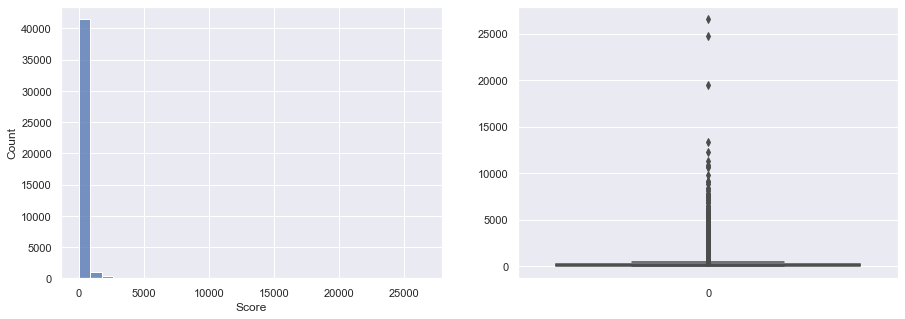

In [36]:
var = 'Score'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [37]:
#Transformation logarithmique
data['Score_log'] = [log(score+1) for score in data['Score']]

<AxesSubplot:>

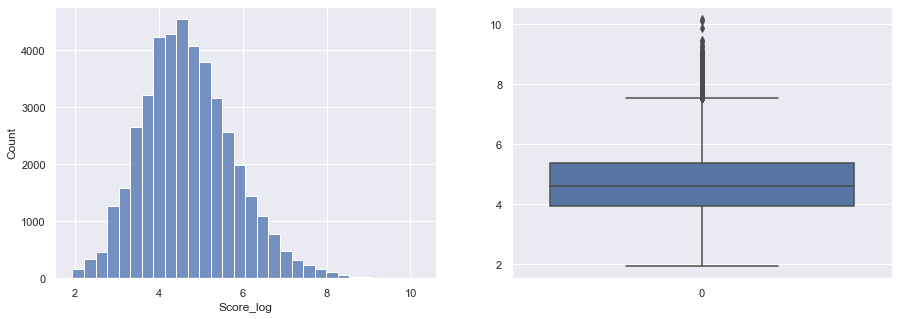

In [38]:
var = 'Score_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

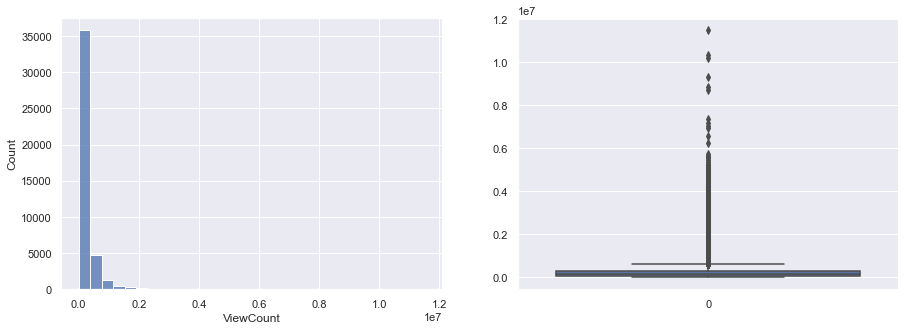

In [39]:
var = 'ViewCount'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [40]:
#Transformation logarithmique
data['ViewCount_log'] = [log(count+1) for count in data['ViewCount']]

<AxesSubplot:>

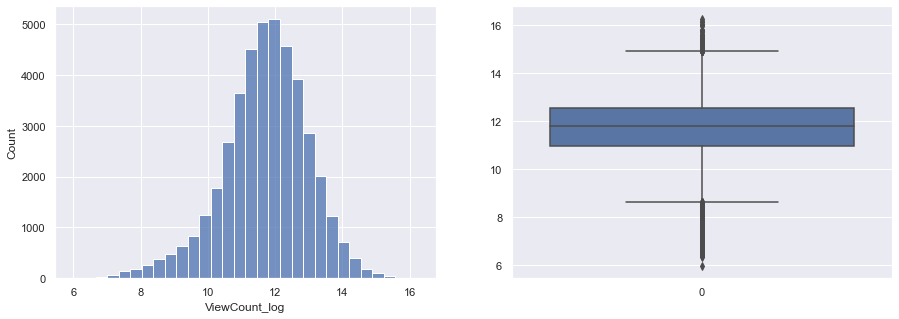

In [41]:
var = 'ViewCount_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

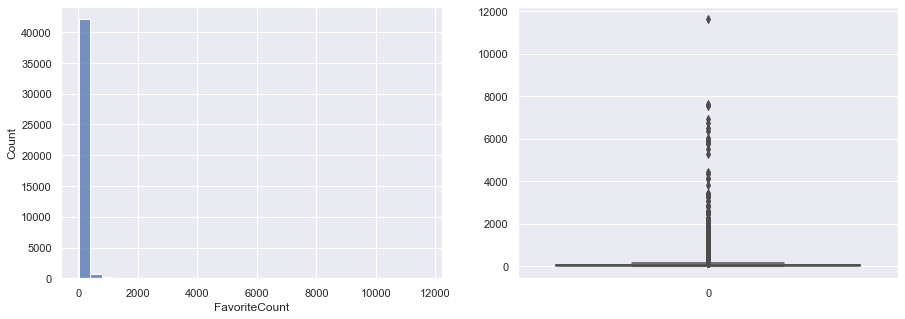

In [42]:
var = 'FavoriteCount'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [43]:
#Transformation logarithmique
data['FavoriteCount_log'] = [log(count+1) for count in data['FavoriteCount']]

<AxesSubplot:>

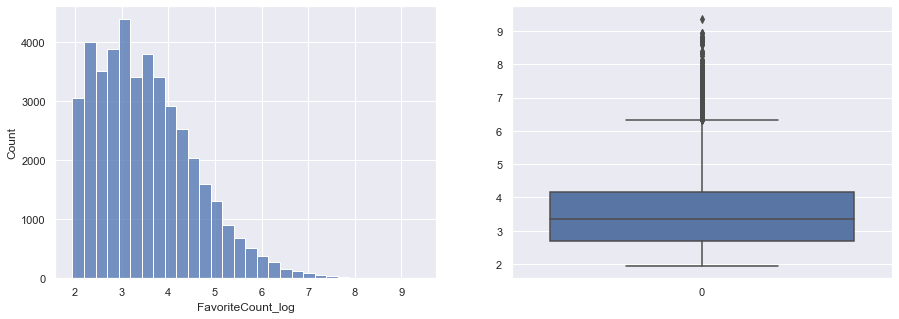

In [44]:
var = 'FavoriteCount_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

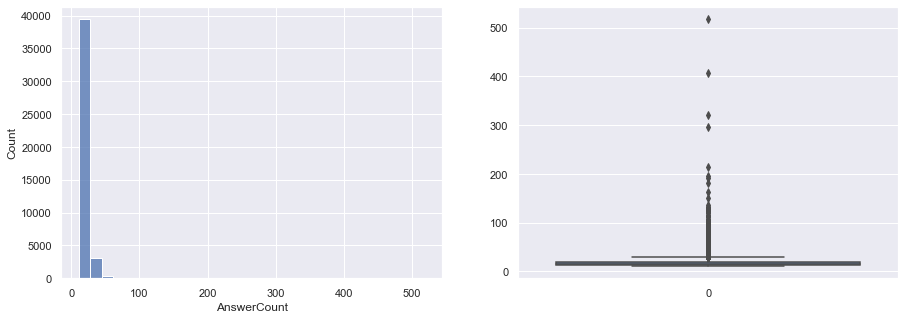

In [45]:
var = 'AnswerCount'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [46]:
#Transformation logarithmique
data['AnswerCount_log'] = [log(count+1) for count in data['AnswerCount']]

<AxesSubplot:>

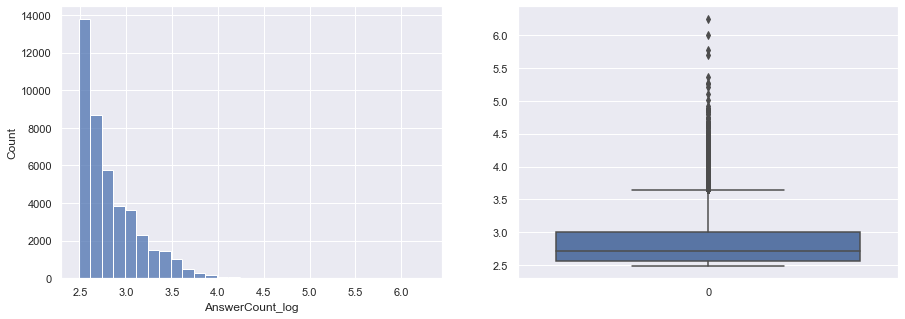

In [47]:
var = 'AnswerCount_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

### Analyse des nouvelles features

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              43079 non-null  object 
 1   Body               43079 non-null  object 
 2   Tags               43079 non-null  object 
 3   Id                 43079 non-null  int64  
 4   Score              43079 non-null  int64  
 5   ViewCount          43079 non-null  int64  
 6   FavoriteCount      43079 non-null  int64  
 7   AnswerCount        43079 non-null  int64  
 8   Title_len          43079 non-null  int64  
 9   Body_len           43079 non-null  int64  
 10  Tags_len           43079 non-null  int64  
 11  Tags_len_ratio     43079 non-null  float64
 12  Score_log          43079 non-null  float64
 13  ViewCount_log      43079 non-null  float64
 14  FavoriteCount_log  43079 non-null  float64
 15  AnswerCount_log    43079 non-null  float64
dtypes: float64(5), int64(8

<AxesSubplot:>

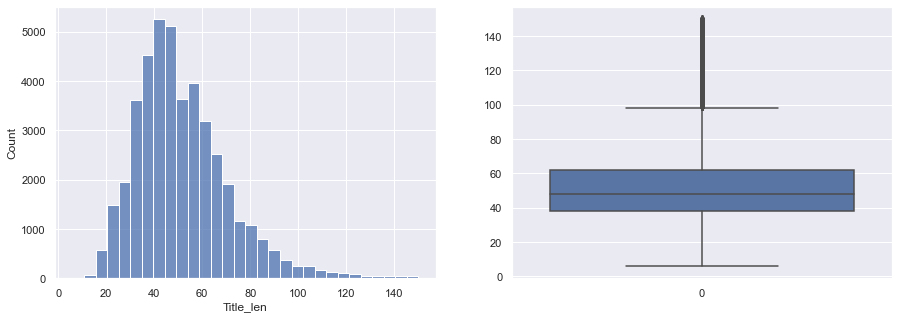

In [49]:
var = 'Title_len'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

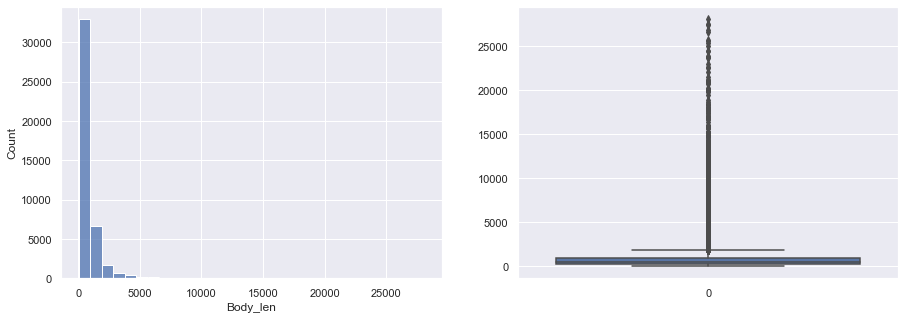

In [50]:
var = 'Body_len'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [51]:
#Transformation logarithmique
data['Body_len_log'] = [log(l+1) for l in data['Body_len']]

<AxesSubplot:>

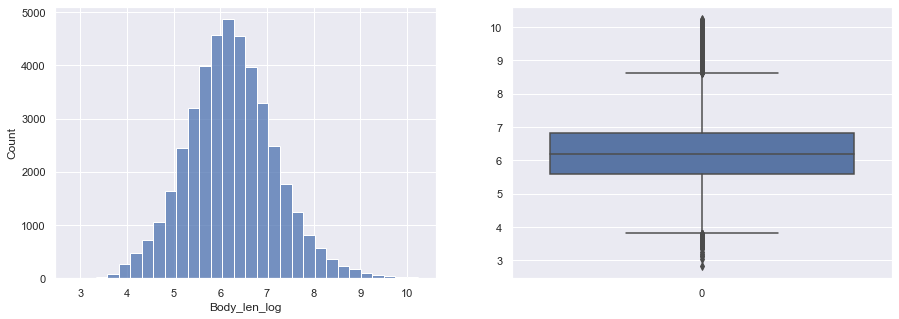

In [52]:
var = 'Body_len_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

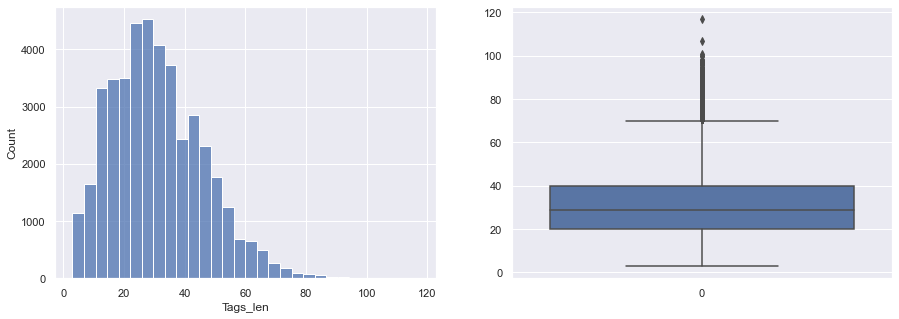

In [53]:
var = 'Tags_len'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

<AxesSubplot:>

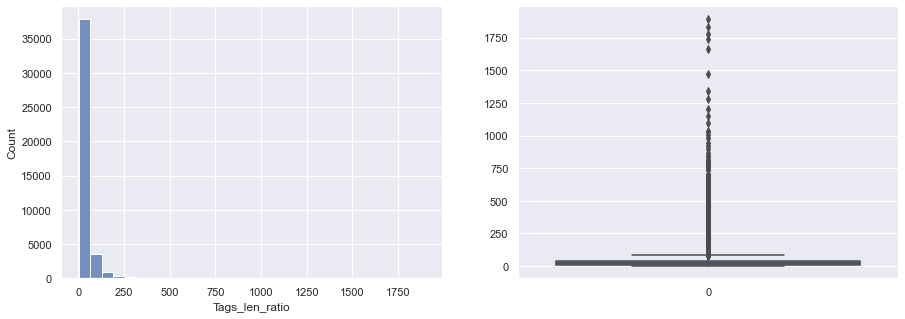

In [54]:
var = 'Tags_len_ratio'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

In [55]:
#Transformation logarithmique
data['Tags_len_ratio_log'] = [log(r+1) for r in data['Tags_len_ratio']]

<AxesSubplot:>

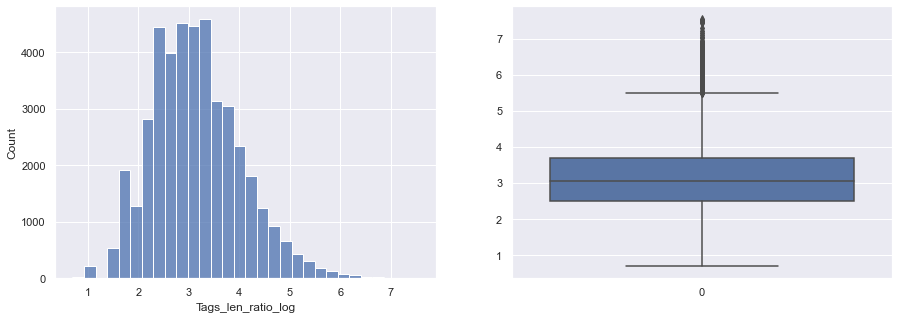

In [56]:
var = 'Tags_len_ratio_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(data, x=var, bins=30, ax=ax1)
sns.boxplot(data = data[var], ax=ax2)

### Exploration des tags

In [57]:
data['Tags_split'] = data.apply(lambda r :r['Tags'].split(), axis=1)

In [58]:
data['Tags_split'].head()

0                          [vue.js, icons, vuetify.js]
1    [c, syntax, printf, format-specifiers, long-long]
2                                   [c, unix, testing]
3                                      [linux, editor]
4                                             [python]
Name: Tags_split, dtype: object

In [59]:
def liste_tags(document) :
    dico_tags = {}
    for sentence in document :
        for tag in sentence :
            if tag in dico_tags :
                dico_tags[tag] += 1
            else :
                dico_tags[tag] = 1
    return dico_tags

In [60]:
dico_tags = liste_tags(data['Tags_split'])

In [61]:
dico_tags

{'vue.js': 93,
 'icons': 32,
 'vuetify.js': 3,
 'c': 917,
 'syntax': 112,
 'printf': 25,
 'format-specifiers': 2,
 'long-long': 1,
 'unix': 233,
 'testing': 142,
 'linux': 671,
 'editor': 82,
 'python': 3590,
 'user-interface': 155,
 'deployment': 59,
 'tkinter': 21,
 'release-management': 10,
 'c#': 3039,
 'visual-studio': 479,
 'setter': 14,
 'getter': 16,
 'recursion': 83,
 'computer-science': 45,
 'oop': 342,
 'design-patterns': 172,
 'inversion-of-control': 13,
 'object': 181,
 'reflection': 96,
 'language-agnostic': 414,
 'c++': 1577,
 'floating-point': 96,
 'rounding': 54,
 'security': 176,
 'cryptography': 25,
 'random': 198,
 'unit-testing': 298,
 'visual-studio-2008': 89,
 'frameworks': 68,
 'go': 85,
 'struct': 44,
 'initialization': 49,
 'default-value': 14,
 'integer': 102,
 'algorithm': 775,
 'optimization': 189,
 'complexity-theory': 25,
 'big-o': 30,
 'performance': 437,
 'javascript': 4480,
 'css': 1497,
 'background-color': 19,
 'sql-server': 676,
 'full-text-search':

In [62]:
tags_df = pd.DataFrame(list(dico_tags.items()), columns = ['Tags', 'Quantity'])

In [63]:
tags_df.head()

,Tags,Quantity
0,vue.js,93
1,icons,32
2,vuetify.js,3
3,c,917
4,syntax,112


In [64]:
tags_df['percent'] = tags_df.apply(lambda r : r['Quantity']*100/tags_df['Quantity'].sum(), axis=1)

In [65]:
tags_df.head()

,Tags,Quantity,percent
0,vue.js,93,0.070461
1,icons,32,0.024245
2,vuetify.js,3,0.002273
3,c,917,0.694760
4,syntax,112,0.084856


In [66]:
tags_df['percent'].sum()

100.0

In [67]:
tags_df.describe()

,Quantity,percent
count,9411.000000,9411.000000
mean,14.024865,0.010626
std,109.827310,0.083210
min,1.000000,0.000758
25%,1.000000,0.000758
50%,2.000000,0.001515
75%,6.000000,0.004546
max,4480.000000,3.394248


<AxesSubplot:>

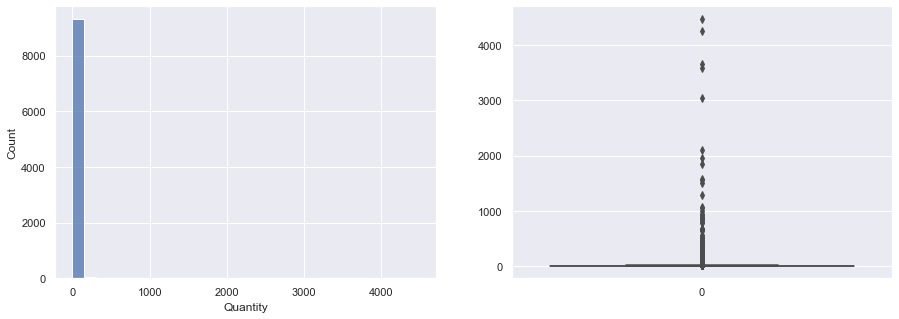

In [68]:
var = 'Quantity'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(tags_df, x=var, bins=30, ax=ax1)
sns.boxplot(data = tags_df[var], ax=ax2)

In [69]:
#Transformation logarithmique
tags_df['Quantity_log'] = [log(r+1) for r in tags_df['Quantity']]

<AxesSubplot:>

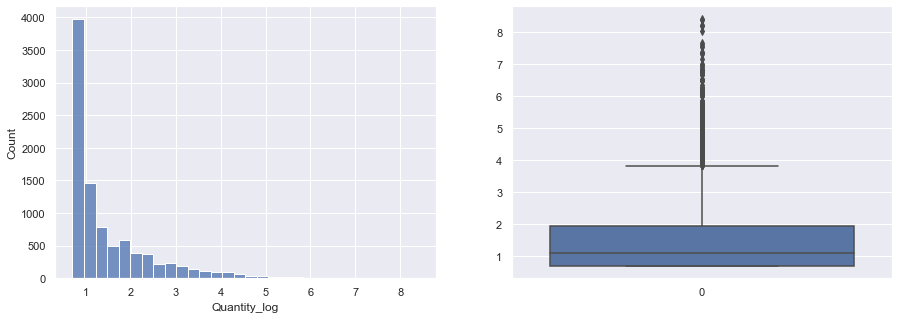

In [70]:
var = 'Quantity_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(tags_df, x=var, bins=30, ax=ax1)
sns.boxplot(data = tags_df[var], ax=ax2)

In [77]:
#Je choisis d'explorer les tags qui ont au moins 200 occurences
freqt_tags = pd.DataFrame(tags_df[tags_df['Quantity']>=200])

In [78]:
freqt_tags.shape

(87, 4)

In [79]:
list(freqt_tags['Tags'])

['c',
 'unix',
 'linux',
 'python',
 'c#',
 'visual-studio',
 'oop',
 'language-agnostic',
 'c++',
 'unit-testing',
 'algorithm',
 'performance',
 'javascript',
 'css',
 'sql-server',
 'mysql',
 'sql',
 'macos',
 'html',
 'multithreading',
 'sorting',
 'java',
 'windows',
 '.net',
 'arrays',
 'ruby-on-rails',
 'database',
 'bash',
 'shell',
 'asp.net',
 'string',
 'xml',
 'json',
 'ios',
 'objective-c',
 'postgresql',
 'tsql',
 'ruby',
 'django',
 'php',
 'file',
 'vim',
 'image',
 'maven',
 'version-control',
 'jquery',
 'dictionary',
 'git',
 'regex',
 'cocoa-touch',
 'android',
 'date',
 'eclipse',
 'spring',
 'math',
 'asp.net-mvc',
 'command-line',
 'twitter-bootstrap',
 'datetime',
 'debugging',
 'laravel',
 'github',
 'reactjs',
 'iphone',
 'uitableview',
 'google-chrome',
 'list',
 'ubuntu',
 'docker',
 'angular',
 'npm',
 'typescript',
 'python-3.x',
 'swift',
 'xcode',
 'visual-studio-code',
 'angularjs',
 'react-native',
 'r',
 'android-studio',
 'intellij-idea',
 'gradle',


[Text(0.5, 1.0, 'Répartition des effectifs pour les Tags les plus fréquents'),
 Text(0.5, 0, 'Tags les plus fréquents')]

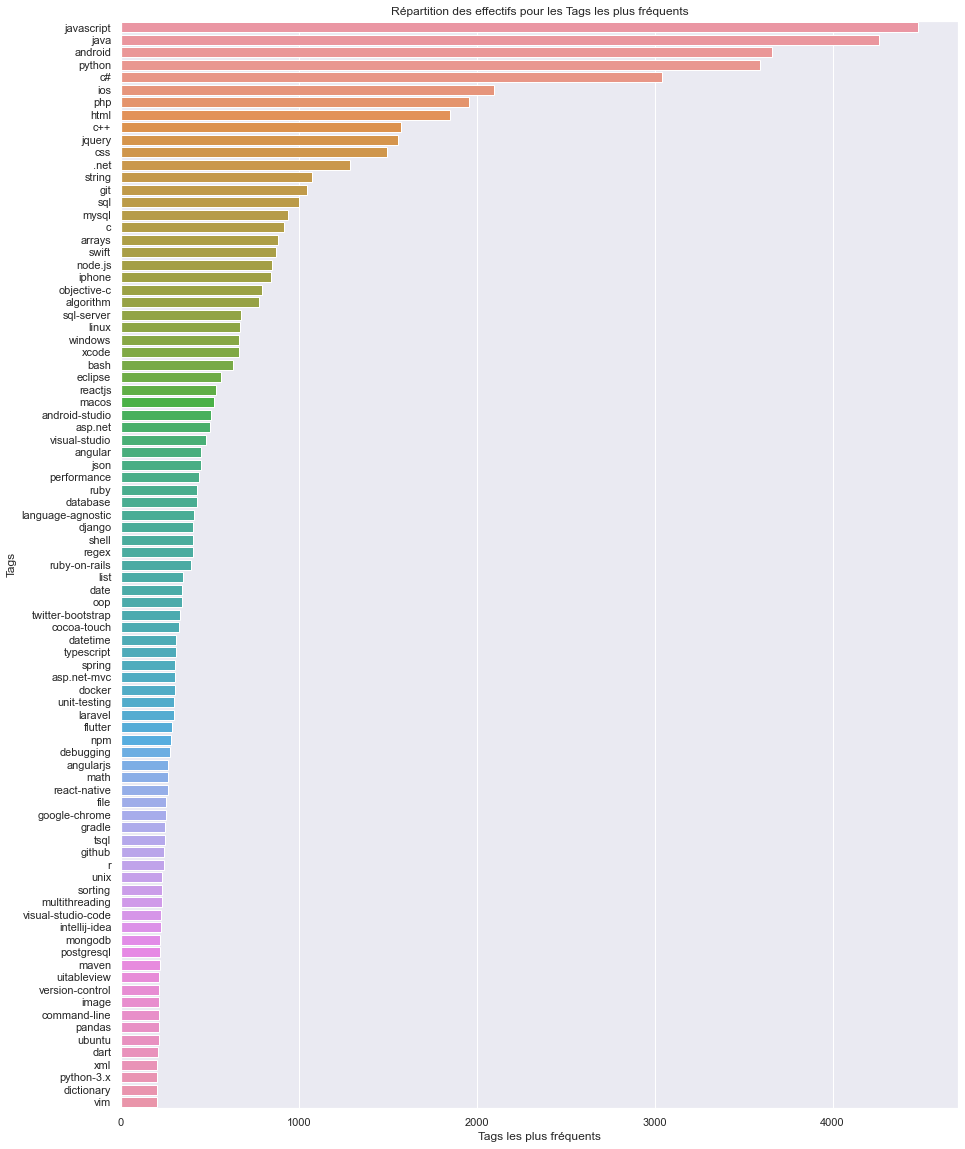

In [80]:
sns.set(rc = {'figure.figsize':(15,20)})
fig = sns.barplot(y = freqt_tags.sort_values('Quantity', ascending = False)['Tags'],
                  x = freqt_tags.sort_values('Quantity', ascending = False)['Quantity'], orient='h')
fig.set(title ="Répartition des effectifs pour les Tags les plus fréquents", xlabel="Tags les plus fréquents")

In [81]:
tags_liste = list(dico_tags.keys())

In [82]:
tags_liste

['vue.js',
 'icons',
 'vuetify.js',
 'c',
 'syntax',
 'printf',
 'format-specifiers',
 'long-long',
 'unix',
 'testing',
 'linux',
 'editor',
 'python',
 'user-interface',
 'deployment',
 'tkinter',
 'release-management',
 'c#',
 'visual-studio',
 'setter',
 'getter',
 'recursion',
 'computer-science',
 'oop',
 'design-patterns',
 'inversion-of-control',
 'object',
 'reflection',
 'language-agnostic',
 'c++',
 'floating-point',
 'rounding',
 'security',
 'cryptography',
 'random',
 'unit-testing',
 'visual-studio-2008',
 'frameworks',
 'go',
 'struct',
 'initialization',
 'default-value',
 'integer',
 'algorithm',
 'optimization',
 'complexity-theory',
 'big-o',
 'performance',
 'javascript',
 'css',
 'background-color',
 'sql-server',
 'full-text-search',
 'mysql',
 'sql',
 'sql-update',
 'macos',
 'selenium',
 'html',
 'textarea',
 'prototypejs',
 'cross-browser',
 'rounded-corners',
 'web-applications',
 'stress-testing',
 'webapplicationstresstool',
 'pylot',
 'multithreading',
 's

In [83]:
len(tags_liste)

9411

In [84]:
stop_w = list(set(stopwords.words('english')))

In [85]:
stop_w_tags = []
for w in stop_w :
    if w in tags_liste :
        stop_w_tags.append(w)
print(stop_w_tags)
print(len(stop_w_tags))

['having', 'd', 'each', 'where', 's', 'between', 'this', 'out', 'any']
9


In [86]:
for tag in stop_w_tags :
    print('Occurence de ', tag, ' :', dico_tags[tag])

Occurence de  having  : 1
Occurence de  d  : 3
Occurence de  each  : 5
Occurence de  where  : 3
Occurence de  s  : 1
Occurence de  between  : 2
Occurence de  this  : 14
Occurence de  out  : 2
Occurence de  any  : 1


In [87]:
print(len(tags_liste))
tags_liste = [t for t in tags_liste if t not in stop_w_tags]
print(len(tags_liste))

9411
9402


In [88]:
print(len(tags_liste))
tags_liste = [t for t in tags_liste if dico_tags[t] >= 3]
print(len(tags_liste))

9402
3975


## Analyse multivariée

### Analyse des corrélations

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               43079 non-null  object 
 1   Body                43079 non-null  object 
 2   Tags                43079 non-null  object 
 3   Id                  43079 non-null  int64  
 4   Score               43079 non-null  int64  
 5   ViewCount           43079 non-null  int64  
 6   FavoriteCount       43079 non-null  int64  
 7   AnswerCount         43079 non-null  int64  
 8   Title_len           43079 non-null  int64  
 9   Body_len            43079 non-null  int64  
 10  Tags_len            43079 non-null  int64  
 11  Tags_len_ratio      43079 non-null  float64
 12  Score_log           43079 non-null  float64
 13  ViewCount_log       43079 non-null  float64
 14  FavoriteCount_log   43079 non-null  float64
 15  AnswerCount_log     43079 non-null  float64
 16  Body

In [91]:
data = data.drop(['Id', 'Score_log', 'ViewCount_log', 'FavoriteCount_log', 'AnswerCount_log', 'Body_len_log',
                'Tags_len_ratio_log'], axis=1)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           43079 non-null  object 
 1   Body            43079 non-null  object 
 2   Tags            43079 non-null  object 
 3   Score           43079 non-null  int64  
 4   ViewCount       43079 non-null  int64  
 5   FavoriteCount   43079 non-null  int64  
 6   AnswerCount     43079 non-null  int64  
 7   Title_len       43079 non-null  int64  
 8   Body_len        43079 non-null  int64  
 9   Tags_len        43079 non-null  int64  
 10  Tags_len_ratio  43079 non-null  float64
 11  Tags_split      43079 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 3.9+ MB


In [93]:
corr = data.corr()
corr

,Score,ViewCount,FavoriteCount,AnswerCount,Title_len,Body_len,Tags_len,Tags_len_ratio
Score,1.000000,0.725440,0.786045,0.326240,-0.018690,-0.070776,0.039049,-0.072526
ViewCount,0.725440,1.000000,0.512086,0.338259,-0.031722,-0.081179,-0.016466,-0.070316
FavoriteCount,0.786045,0.512086,1.000000,0.387320,-0.021882,-0.038979,0.051427,-0.043482
AnswerCount,0.326240,0.338259,0.387320,1.000000,0.035894,0.010252,0.031094,0.004289
Title_len,-0.018690,-0.031722,-0.021882,0.035894,1.000000,0.150262,0.138613,0.094114
Body_len,-0.070776,-0.081179,-0.038979,0.010252,0.150262,1.000000,0.131088,0.754761
Tags_len,0.039049,-0.016466,0.051427,0.031094,0.138613,0.131088,1.000000,-0.236918
Tags_len_ratio,-0.072526,-0.070316,-0.043482,0.004289,0.094114,0.754761,-0.236918,1.000000


<AxesSubplot:>

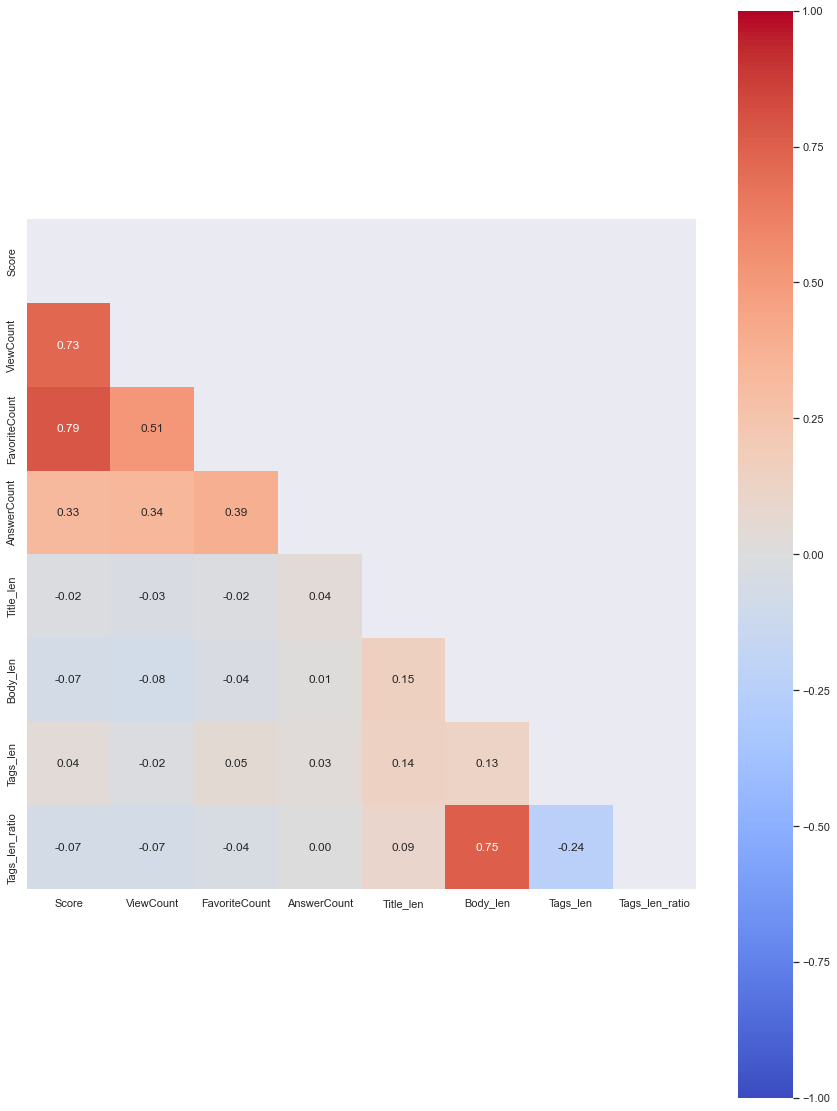

In [94]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f", square=True)

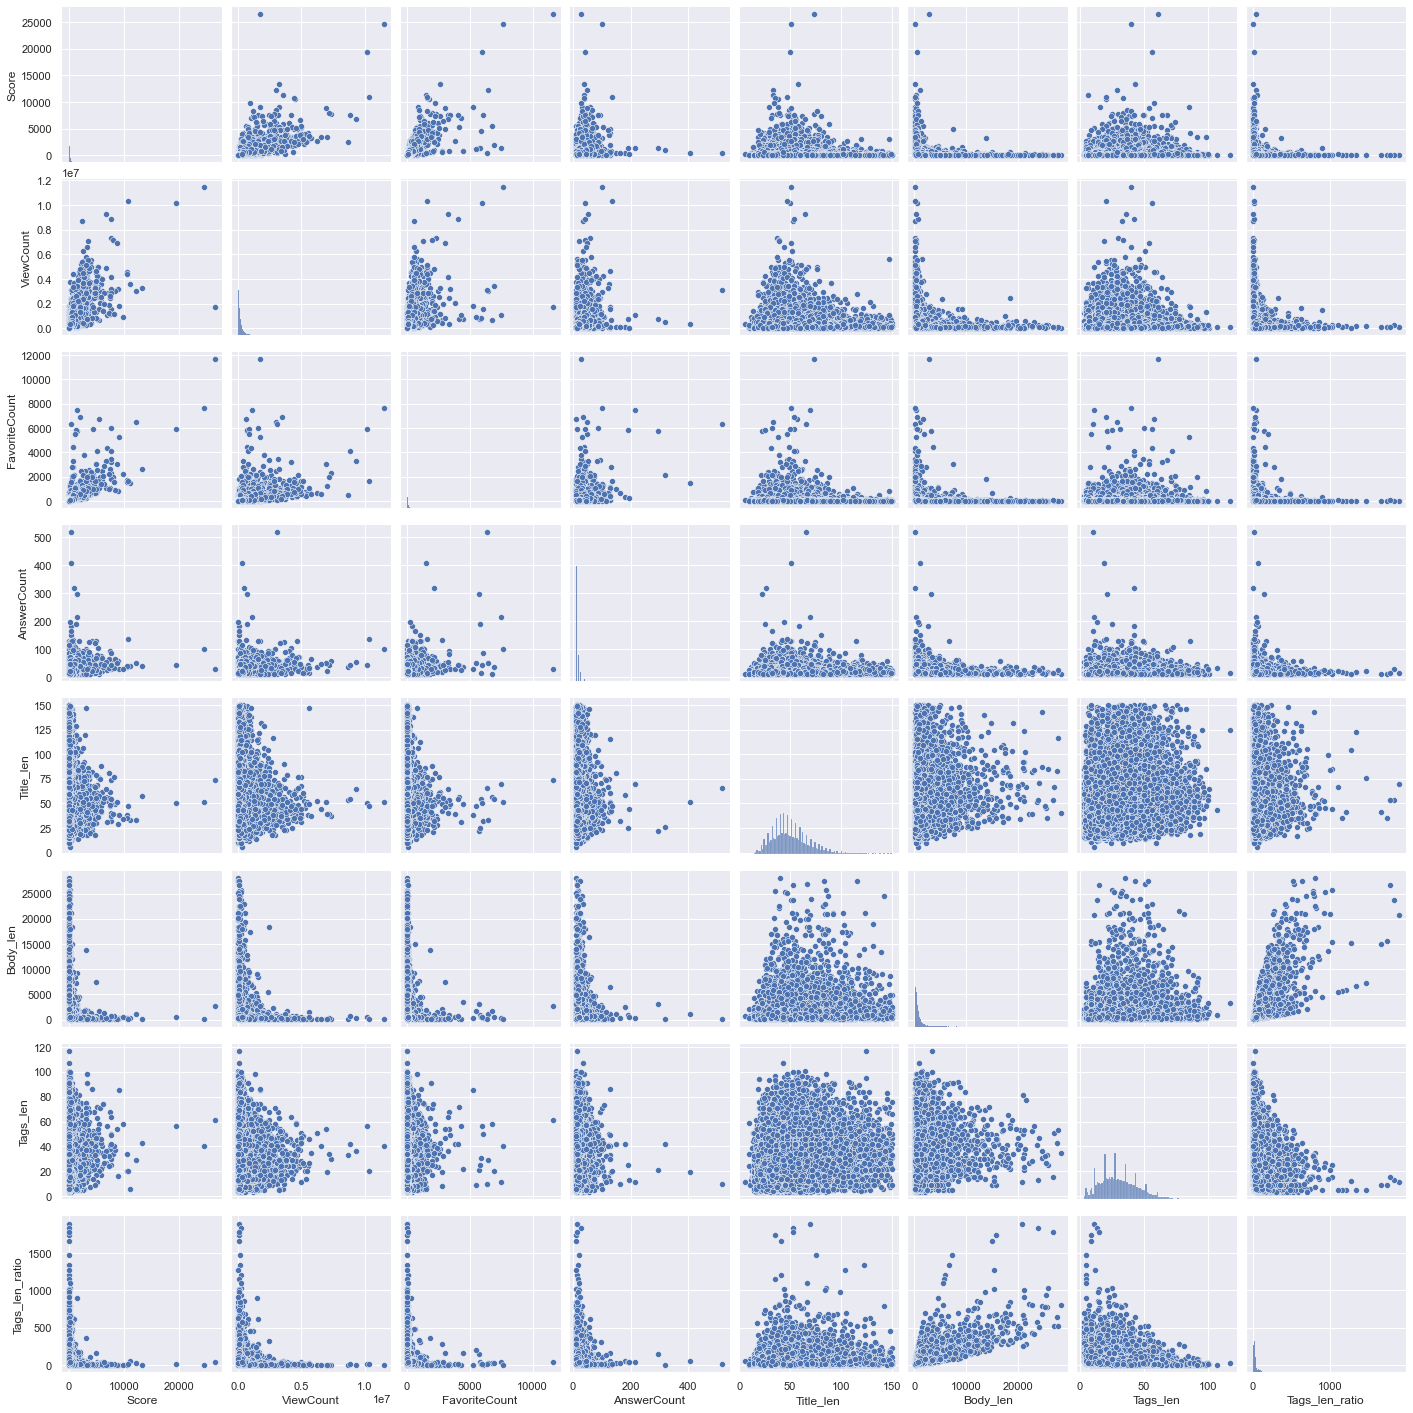

In [95]:
sns.pairplot(data)

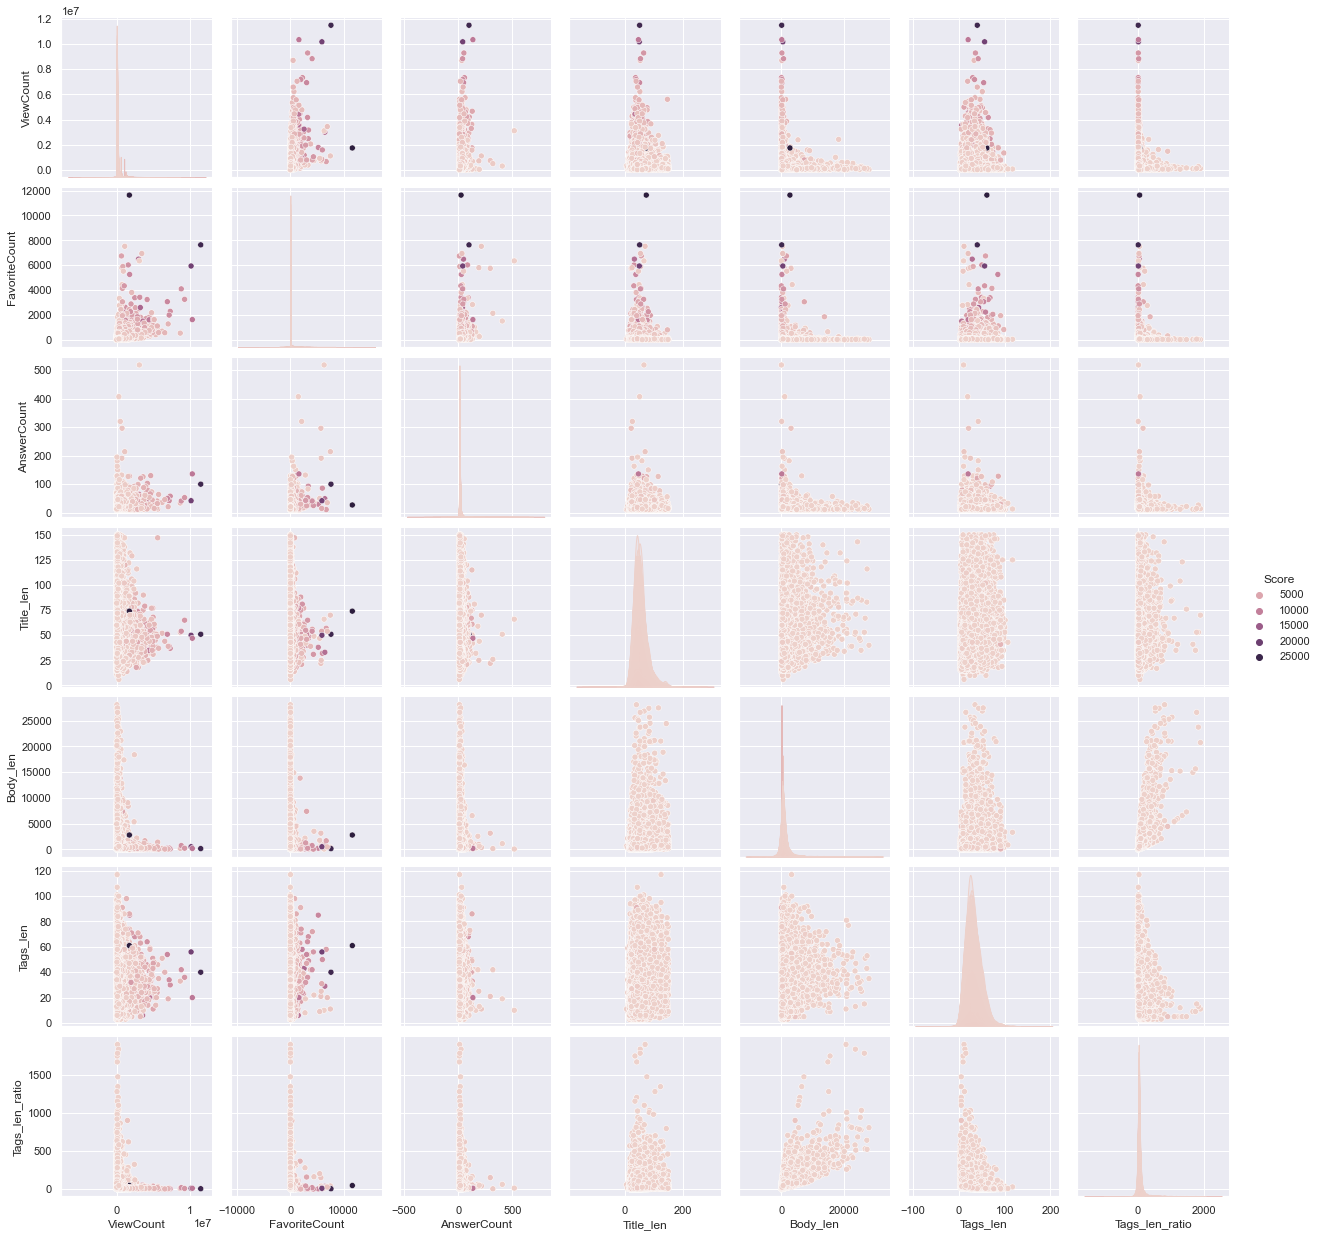

In [96]:
sns.pairplot(data, hue = 'Score')

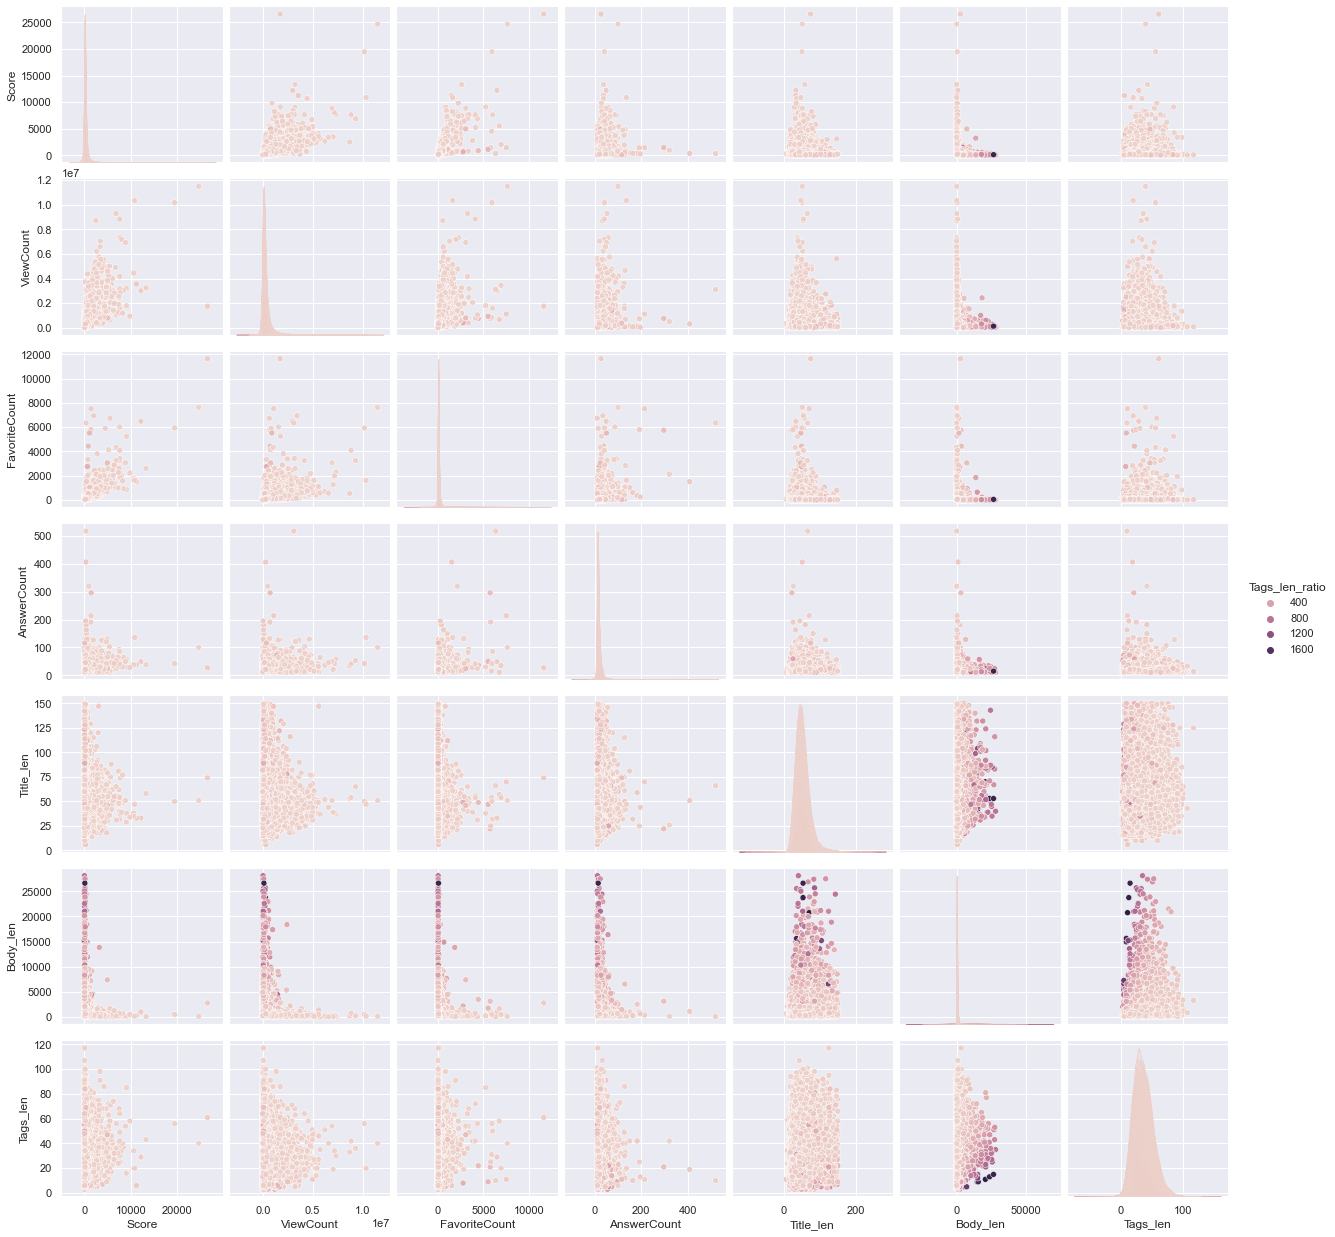

In [97]:
sns.pairplot(data, hue = 'Tags_len_ratio')

In [98]:
data.sort_values('Score').head()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Title_len,Body_len,Tags_len,Tags_len_ratio,Tags_split
10000,Getting started with Tcl TK?,One of my modules at university next year is g...,tcl,6,5119,13,12,28,766,5,159.0,[tcl]
2605,How can I get class-based objects in JavaScrip...,I'm trying to move from Prototype to jQuery an...,javascript jquery class,6,11712,6,11,60,444,27,19.0,"[javascript, jquery, class]"
24485,free non-gpl data compression libraries,"i'm writing project that stores data, so i nee...",c++ compression zlib,6,5561,7,11,39,463,24,21.0,"[c++, compression, zlib]"
9987,Downcasting in C#,I'm facing a problem that I don't know how to ...,c# inheritance downcast,6,6958,7,11,17,1746,27,65.0,"[c#, inheritance, downcast]"
13377,Comma separated values in a database field,I have a products table. Each row in that tab...,sql database tsql stored-procedures,6,32337,6,11,42,683,40,18.0,"[sql, database, tsql, stored-procedures]"


In [99]:
data.sort_values('Score').tail()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Title_len,Body_len,Tags_len,Tags_len_ratio,Tags_split
764,"What does the ""yield"" keyword do?",What is the use of the yield keyword in Python...,python iterator generator,12213,2994519,6490,49,33,1017,29,36.0,"[python, iterator, generator]"
12430,What is the difference between 'git pull' and ...,What are the differences between git pull and ...,git version-control git-pull git-fetch,13326,3237194,2594,38,58,57,43,3.0,"[git, version-control, git-pull, git-fetch]"
25325,How do I delete a Git branch locally and remot...,Failed Attempts to Delete a Remote Branch:\n$ ...,git version-control git-branch git-push g...,19470,10185190,5935,42,50,512,56,10.0,"[git, version-control, git-branch, git-push, g..."
13778,How do I undo the most recent local commits in...,I accidentally committed the wrong files to Gi...,git version-control git-commit undo,24683,11503812,7635,100,51,150,40,5.0,"[git, version-control, git-commit, undo]"
41069,Why is processing a sorted array faster than p...,Here is a piece of C++ code that shows some ve...,java c++ performance cpu-architecture bra...,26576,1738587,11640,27,74,2789,61,47.0,"[java, c++, performance, cpu-architecture, bra..."


In [100]:
data.sort_values('Tags_len_ratio').head()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Title_len,Body_len,Tags_len,Tags_len_ratio,Tags_split
41336,Remove empty lines in text using Visual Studio...,How to remove empty lines in Visual Studio?\n,regex visual-studio visual-studio-2010 vis...,169,119047,76,13,57,44,68,1.0,"[regex, visual-studio, visual-studio-2010, vis..."
1481,What is a coroutine?,What is a coroutine? How are they related to c...,concurrency language-agnostic terminology ...,264,88446,102,13,20,58,56,1.0,"[concurrency, language-agnostic, terminology, ..."
35085,Email validation on textField in iOS,"In iOS App, how to add Email validation on UIT...",ios objective-c cocoa-touch uitextfield e...,45,66003,44,14,36,56,62,1.0,"[ios, objective-c, cocoa-touch, uitextfield, e..."
42596,AngularJS: Service vs provider vs factory,"What are the differences between a Service, Pr...",angularjs dependency-injection angularjs-se...,3390,780228,1939,30,41,79,91,1.0,"[angularjs, dependency-injection, angularjs-se..."
30618,Why is === faster than == in PHP?,Why is === faster than == in PHP?\n,php operators comparison-operators equalit...,172,35680,36,12,33,34,76,1.0,"[php, operators, comparison-operators, equalit..."


In [101]:
data.sort_values('Tags_len_ratio').tail()

,Title,Body,Tags,Score,ViewCount,FavoriteCount,AnswerCount,Title_len,Body_len,Tags_len,Tags_len_ratio,Tags_split
15031,Eclipse won't start but no error is shown,Any idea why my Eclipse isn't starting?\nThe e...,eclipse,57,87347,23,12,41,14946,9,1665.0,[eclipse]
26776,Eclipse Juno Startup error log file,I've been using Eclipse Juno perfectly fine un...,eclipse,35,70089,15,11,35,15650,9,1743.0,[eclipse]
42375,Eclipse will not start and I haven't changed a...,I haven't updated anything for at least a mont...,java eclipse,112,119423,54,15,53,26633,15,1779.0,"[java, eclipse]"
19390,"Why am I getting a ""401 Unauthorized"" error in...","Why am I getting a ""401 Unauthorized"" error in...",java maven,153,256901,29,27,53,23762,13,1832.0,"[java, maven]"
14755,Hibernate: More than one row with the given id...,I'm using spring 4.0.5 and hibernate 4.3.5; I'...,hibernate,54,114263,20,14,70,20760,11,1894.0,[hibernate]


### Exploration du corpus

In [102]:
df_embedding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   43079 non-null  object
 1   Body    43079 non-null  object
 2   Tags    43079 non-null  object
dtypes: object(3)
memory usage: 1009.8+ KB


In [103]:
df_sample = df_embedding.sample(10)
df_sample

,Title,Body,Tags
19563,javascript | Object grouping,I have an object. It looks like below:\n[\n {...,javascript object merge grouping
26534,getLoaderManager().initLoader() doesn't accept...,I'm having trouble following a guide on using ...,android sqlite android-loadermanager andro...
22749,Android Studio disable line wrap,I have this strange line wrap on Android Studi...,android android-studio
37199,iOS application: how to clear notifications?,I've an iOS application where some Push Notifi...,objective-c cocoa-touch apple-push-notifica...
28458,"Problems using subl command in terminal: ""Comm...",I want to apologize in advance that this is a ...,bash terminal sublimetext2
35727,What are important languages to learn to under...,When all you have is a pair of bolt cutters an...,language-agnostic programming-languages
38450,Changing CMAKE_CXX_FLAGS in project,I have the following content in my CMakeLists....,cmake compiler-flags
29770,Java compiler level does not match the version...,I have created a New Dynamic Project under Ecl...,eclipse maven m2eclipse
29438,Angular2 Cannot find namespace 'google',I am working with angular2-google-maps and lat...,google-maps angular typescript angular-cli...
36650,How to insert a character in a string at a cer...,I'm getting in an int with a 6 digit value. I ...,java string casting


#### Title

In [104]:
for idx, ser in df_sample.iterrows():
    txt_1 = f"Tags : {ser['Tags']}\n"
    print(txt_1 + ser['Title'] + '\n')

Tags :  javascript  object  merge  grouping 
javascript | Object grouping

Tags :  android  sqlite  android-loadermanager  android-listfragment 
getLoaderManager().initLoader() doesn't accept 'this' as argument though the class (ListFragment) implements LoaderManager.LoaderCallbacks

Tags :  android  android-studio 
Android Studio disable line wrap

Tags :  objective-c  cocoa-touch  apple-push-notifications 
iOS application: how to clear notifications?

Tags :  bash  terminal  sublimetext2 
Problems using subl command in terminal: "Command not found" & "No such file or directory"

Tags :  language-agnostic  programming-languages 
What are important languages to learn to understand different approaches and concepts?

Tags :  cmake  compiler-flags 
Changing CMAKE_CXX_FLAGS in project

Tags :  eclipse  maven  m2eclipse 
Java compiler level does not match the version of the installed Java project facet

Tags :  google-maps  angular  typescript  angular-cli  angular2-google-maps 
Angular2 C

#### Body

In [105]:
for idx, ser in df_sample.iterrows():
    txt_1 = f"Tags : {ser['Tags']}\n"
    print(txt_1 + ser['Body'] + '\n')

Tags :  javascript  object  merge  grouping 
I have an object. It looks like below:
[
  {
    "name":"Display",
    "group":"Technical detals",
    "id":"60",
    "value":"4"
  },
  {
    "name":"Manufacturer",
    "group":"Manufacturer",
    "id":"58",
    "value":"Apple"
  },
  {
    "name":"OS",
    "group":"Technical detals",
    "id":"37",
    "value":"Apple iOS"
  }
]

I would like to group this data by group field and get this object:
var obj = {
    0 = [
    {
       'group'   = 'Technical detals',
       'name'    = 'Display',
       'id'      = '60',
       'value'   = '4'
    },
    {
       'group'   = 'Technical detals',
       'name'    = 'OS',
       'id'      = '37',
       'value'   = 'Apple iOS'
    }],
    1   = [
    {
       'group'   = 'Manufacturer',
       'name'    = 'Manufacturer',
       'id'      = '58',
       'value'   = 'Apple'
    }]
}

How can I group my first object?


Tags :  android  sqlite  android-loadermanager  android-listfragment 
I'm having tr

## Text processing

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           43079 non-null  object 
 1   Body            43079 non-null  object 
 2   Tags            43079 non-null  object 
 3   Score           43079 non-null  int64  
 4   ViewCount       43079 non-null  int64  
 5   FavoriteCount   43079 non-null  int64  
 6   AnswerCount     43079 non-null  int64  
 7   Title_len       43079 non-null  int64  
 8   Body_len        43079 non-null  int64  
 9   Tags_len        43079 non-null  int64  
 10  Tags_len_ratio  43079 non-null  float64
 11  Tags_split      43079 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 3.9+ MB


In [120]:
df_bow = data[['Title', 'Body', 'Tags_split']]
print(df_bow.shape)

(43079, 3)


### Suppression des majuscules

In [121]:
def sup_maj(sentence) :
    return sentence.lower()

In [122]:
df_bow["Title"] = df_bow["Title"].apply(sup_maj)
df_bow["Title"].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\380646072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow["Title"] = df_bow["Title"].apply(sup_maj)


0                             vuetify icon not showing
1    how do you format an unsigned long long int us...
2                 choosing a static code analysis tool
3                  text editor for linux (besides vi)?
4    python "syntaxerror: non-ascii character '\xe2...
Name: Title, dtype: object

In [123]:
df_bow["Body"] = df_bow["Body"].apply(sup_maj)
df_bow["Body"].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\3602103591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow["Body"] = df_bow["Body"].apply(sup_maj)


0    i am using vue.js and vuetify. i want to add a...
1    #include <stdio.h>\nint main() {\n    unsigned...
2    i'm working on a project where i'm coding in c...
3    let me preface this question by saying i use t...
4    i am writing some python code and i am receivi...
Name: Body, dtype: object

### Isoler les Tags présents dans les documents

#### Spliter Title et Body

In [124]:
df_bow['Title_split'] = df_bow.apply(lambda r :r['Title'].split(), axis=1)

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\4012462173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow['Title_split'] = df_bow.apply(lambda r :r['Title'].split(), axis=1)


In [125]:
df_bow['Body_split'] = df_bow.apply(lambda r :r['Body'].split(), axis=1)

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\3933460197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow['Body_split'] = df_bow.apply(lambda r :r['Body'].split(), axis=1)


In [126]:
df_bow.head()

,Title,Body,Tags_split,Title_split,Body_split
0,vuetify icon not showing,i am using vue.js and vuetify. i want to add a...,"[vue.js, icons, vuetify.js]","[vuetify, icon, not, showing]","[i, am, using, vue.js, and, vuetify., i, want,..."
1,how do you format an unsigned long long int us...,#include <stdio.h>\nint main() {\n unsigned...,"[c, syntax, printf, format-specifiers, long-long]","[how, do, you, format, an, unsigned, long, lon...","[#include, <stdio.h>, int, main(), {, unsigned..."
2,choosing a static code analysis tool,i'm working on a project where i'm coding in c...,"[c, unix, testing]","[choosing, a, static, code, analysis, tool]","[i'm, working, on, a, project, where, i'm, cod..."
3,text editor for linux (besides vi)?,let me preface this question by saying i use t...,"[linux, editor]","[text, editor, for, linux, (besides, vi)?]","[let, me, preface, this, question, by, saying,..."
4,"python ""syntaxerror: non-ascii character '\xe2...",i am writing some python code and i am receivi...,[python],"[python, ""syntaxerror:, non-ascii, character, ...","[i, am, writing, some, python, code, and, i, a..."


#### Isoler les Tags

In [127]:
def extract_tags(sentence) :
    return [w for w in sentence if w not in tags_liste]

In [128]:
def save_tags(sentence) :
    return [w for w in sentence if w in tags_liste]

In [129]:
df_bow['Title_not_Tags'] = df_bow['Title_split'].apply(extract_tags)
df_bow['Title_not_Tags'].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\2935618674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow['Title_not_Tags'] = df_bow['Title_split'].apply(extract_tags)


0                    [vuetify, icon, not, showing]
1          [how, do, you, an, long, long, printf?]
2              [choosing, a, code, analysis, tool]
3                            [for, (besides, vi)?]
4    ["syntaxerror:, non-ascii, '\xe2', in, file"]
Name: Title_not_Tags, dtype: object

In [130]:
df_bow['Title_Tags'] = df_bow['Title_split'].apply(save_tags)
df_bow['Title_Tags'].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\2838989454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow['Title_Tags'] = df_bow['Title_split'].apply(save_tags)


0                                []
1    [format, unsigned, int, using]
2                          [static]
3             [text, editor, linux]
4               [python, character]
Name: Title_Tags, dtype: object

In [131]:
df_bow['Body_not_Tags'] = df_bow['Body_split'].apply(extract_tags)
df_bow['Body_not_Tags'].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\3861150097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow['Body_not_Tags'] = df_bow['Body_split'].apply(extract_tags)


0    [i, am, and, vuetify., i, want, to, an, icon, ...
1    [#include, <stdio.h>, main(), {, long, long, n...
2    [i'm, working, on, a, where, i'm, coding, in, ...
3    [let, me, preface, this, question, by, saying,...
4    [i, am, writing, some, code, and, i, am, recei...
Name: Body_not_Tags, dtype: object

In [132]:
df_bow['Body_Tags'] = df_bow['Body_split'].apply(save_tags)
df_bow['Body_Tags'].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\3008309461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow['Body_Tags'] = df_bow['Body_split'].apply(save_tags)


0         [using, vue.js, add, import, import, import]
1    [int, unsigned, int, bits, int, return, printi...
2          [project, c, unix, using, lint, lint, time]
3    [textmate, text, comparable, linux, search, ru...
4    [python, message, character, line, character, ...
Name: Body_Tags, dtype: object

### Tokénisation

In [133]:
def join_fct(sentence) :
    return ' '.join(sentence)

In [134]:
df_bow["Title_not_Tags"] = df_bow["Title_not_Tags"].apply(join_fct)
df_bow["Title_not_Tags"].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\374718119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow["Title_not_Tags"] = df_bow["Title_not_Tags"].apply(join_fct)


0                   vuetify icon not showing
1            how do you an long long printf?
2              choosing a code analysis tool
3                          for (besides vi)?
4    "syntaxerror: non-ascii '\xe2' in file"
Name: Title_not_Tags, dtype: object

In [135]:
df_bow["Body_not_Tags"] = df_bow["Body_not_Tags"].apply(join_fct)
df_bow["Body_not_Tags"].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\3394621990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow["Body_not_Tags"] = df_bow["Body_not_Tags"].apply(join_fct)


0    i am and vuetify. i want to an icon but it is ...
1    #include <stdio.h> main() { long long num = 28...
2    i'm working on a where i'm coding in in a envi...
3    let me preface this question by saying i use o...
4    i am writing some code and i am receiving the ...
Name: Body_not_Tags, dtype: object

In [136]:
def tokenizer_fct(sentence) :
    sentence_clean_1 = sentence.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    sentence_clean_2 = ''.join([i for i in sentence_clean_1 if not i.isdigit()])
    tokens = word_tokenize(sentence_clean_2)
    return tokens

In [137]:
df_bow["Title_tok"] = df_bow["Title_not_Tags"].apply(tokenizer_fct)
df_bow["Title_tok"].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\2966601287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow["Title_tok"] = df_bow["Title_not_Tags"].apply(tokenizer_fct)


0              [vuetify, icon, not, showing]
1     [how, do, you, an, long, long, printf]
2        [choosing, a, code, analysis, tool]
3                         [for, besides, vi]
4    [syntaxerror, non, ascii, xe, in, file]
Name: Title_tok, dtype: object

In [138]:
df_bow["Body_tok"] = df_bow["Body_not_Tags"].apply(tokenizer_fct)
df_bow["Body_tok"].head()

C:\Users\n_a_e\AppData\Local\Temp\ipykernel_44408\1400988791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bow["Body_tok"] = df_bow["Body_not_Tags"].apply(tokenizer_fct)


0    [i, am, and, vuetify, i, want, to, an, icon, b...
1    [include, stdio, h, main, long, long, num, fyi...
2    [i, m, working, on, a, where, i, m, coding, in...
3    [let, me, preface, this, question, by, saying,...
4    [i, am, writing, some, code, and, i, am, recei...
Name: Body_tok, dtype: object

### Normalisation

In [139]:
def word_filter(list_words) :
    filtered_w1 = [w for w in list_words if w not in stop_w]
    filtered_w2 = [w for w in filtered_w1 if len(w) > 2]
    return filtered_w2

In [140]:
df_bow["Title_tok_f"] = df_bow["Title_tok"].apply(word_filter)
df_bow["Title_tok_f"].head()

0            [vuetify, icon, showing]
1                [long, long, printf]
2    [choosing, code, analysis, tool]
3                           [besides]
4     [syntaxerror, non, ascii, file]
Name: Title_tok_f, dtype: object

In [141]:
df_bow["Body_tok_f"] = df_bow["Body_tok"].apply(word_filter)
df_bow["Body_tok_f"].head()

0    [vuetify, want, icon, working, expected, rende...
1    [include, stdio, main, long, long, num, fyi, f...
2    [working, coding, environment, tool, check, so...
3    [let, preface, question, saying, use, mac, osx...
4    [writing, code, receiving, error, title, searc...
Name: Body_tok_f, dtype: object

### Lemmatization

In [142]:
lemmatizer = WordNetLemmatizer()

def lemma_fct(list_words) :
    lemma_w = []
    for w in list_words :
        lemma_w.append(lemmatizer.lemmatize(w))
    return lemma_w

In [143]:
df_bow["Title_tok_lem"] = df_bow["Title_tok_f"].apply(lemma_fct)
df_bow["Title_tok_lem"].head()

0            [vuetify, icon, showing]
1                [long, long, printf]
2    [choosing, code, analysis, tool]
3                           [besides]
4     [syntaxerror, non, ascii, file]
Name: Title_tok_lem, dtype: object

In [144]:
df_bow["Body_tok_lem"] = df_bow["Body_tok_f"].apply(lemma_fct)
df_bow["Body_tok_lem"].head()

0    [vuetify, want, icon, working, expected, rende...
1    [include, stdio, main, long, long, num, fyi, f...
2    [working, coding, environment, tool, check, so...
3    [let, preface, question, saying, use, mac, osx...
4    [writing, code, receiving, error, title, searc...
Name: Body_tok_lem, dtype: object

### Intégration des Tags

In [145]:
df_bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           43079 non-null  object
 1   Body            43079 non-null  object
 2   Tags_split      43079 non-null  object
 3   Title_split     43079 non-null  object
 4   Body_split      43079 non-null  object
 5   Title_not_Tags  43079 non-null  object
 6   Title_Tags      43079 non-null  object
 7   Body_not_Tags   43079 non-null  object
 8   Body_Tags       43079 non-null  object
 9   Title_tok       43079 non-null  object
 10  Body_tok        43079 non-null  object
 11  Title_tok_f     43079 non-null  object
 12  Body_tok_f      43079 non-null  object
 13  Title_tok_lem   43079 non-null  object
 14  Body_tok_lem    43079 non-null  object
dtypes: object(15)
memory usage: 4.9+ MB


In [146]:
df_bow['Title_tt'] = df_bow['Title_tok_lem'].apply(join_fct)

In [147]:
for i in range(len(df_bow)) :
    df_bow['Title_tt'][i] = [*df_bow['Title_tok_lem'][i], *df_bow['Title_Tags'][i]]

In [148]:
df_bow['Title_tt'].head()

0                             [vuetify, icon, showing]
1    [long, long, printf, format, unsigned, int, us...
2             [choosing, code, analysis, tool, static]
3                       [besides, text, editor, linux]
4    [syntaxerror, non, ascii, file, python, charac...
Name: Title_tt, dtype: object

In [149]:
df_bow['Body_tt'] = df_bow['Body_tok_lem'].apply(join_fct)

In [150]:
for i in range(len(df_bow)) :
    df_bow['Body_tt'][i] = [*df_bow['Body_tok_lem'][i], *df_bow['Body_Tags'][i]]

In [151]:
df_bow["Body_tt"].head()

0    [vuetify, want, icon, working, expected, rende...
1    [include, stdio, main, long, long, num, fyi, f...
2    [working, coding, environment, tool, check, so...
3    [let, preface, question, saying, use, mac, osx...
4    [writing, code, receiving, error, title, searc...
Name: Body_tt, dtype: object

### Comparaison des données cleanées et non cleanées

#### Title

In [152]:
df_bow_sample_title = df_bow[['Title', 'Title_tt']].sample(20)

In [153]:
for idx, ser in df_bow_sample_title.iterrows():
    txt_1 = f"Non cleané : {ser['Title']}\n"
    txt_2 = f"cleané : {ser['Title_tt']}\n"
    print(txt_1 + txt_2)

Non cleané : get start and end days for a given week in php
cleané : ['start', 'end', 'given', 'week', 'get', 'days', 'php']

Non cleané : how to enable multidexing with the new android multidex support library
cleané : ['enable', 'multidexing', 'new', 'multidex', 'support', 'library', 'android']

Non cleané : iphone codesign object file format invalid or unsuitable
cleané : ['invalid', 'unsuitable', 'iphone', 'codesign', 'object', 'file', 'format']

Non cleané : programmatically obtain the phone number of the android phone
cleané : ['programmatically', 'obtain', 'phone', 'number', 'phone', 'android']

Non cleané : c# field naming guidelines?
cleané : ['guideline', 'c#', 'field', 'naming']

Non cleané : how to safely call an async method in c# without await
cleané : ['safely', 'async', 'method', 'without', 'await', 'call', 'c#']

Non cleané : servlet returns "http status 404 the requested resource (/servlet) is not available"
cleané : ['servlet', 'return', 'http', 'requested', 'resourc

#### Body

In [154]:
df_bow_sample_body = df_bow[['Body', 'Body_tt']].sample(5)

In [155]:
for idx, ser in df_bow_sample_body.iterrows():
    txt_1 = f"Non cleané : {ser['Body']}\n"
    txt_2 = f"cleané : {ser['Body_tt']}\n"
    print(txt_1 + txt_2)

Non cleané : i have a python dictionary like the following:
{u'2012-06-08': 388,
 u'2012-06-09': 388,
 u'2012-06-10': 388,
 u'2012-06-11': 389,
 u'2012-06-12': 389,
 u'2012-06-13': 389,
 u'2012-06-14': 389,
 u'2012-06-15': 389,
 u'2012-06-16': 389,
 u'2012-06-17': 389,
 u'2012-06-18': 390,
 u'2012-06-19': 390,
 u'2012-06-20': 390,
 u'2012-06-21': 390,
 u'2012-06-22': 390,
 u'2012-06-23': 390,
 u'2012-06-24': 390,
 u'2012-06-25': 391,
 u'2012-06-26': 391,
 u'2012-06-27': 391,
 u'2012-06-28': 391,
 u'2012-06-29': 391,
 u'2012-06-30': 391,
 u'2012-07-01': 391,
 u'2012-07-02': 392,
 u'2012-07-03': 392,
 u'2012-07-04': 392,
 u'2012-07-05': 392,
 u'2012-07-06': 392}

the keys are unicode dates and the values are integers. i would like to convert this into a pandas dataframe by having the dates and their corresponding values as two separate columns. example: col1: dates col2: datevalue (the dates are still unicode and datevalues are still integers)
     date         datevalue
0    2012-07-01 

### df_bag_of_words

In [156]:
df_bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           43079 non-null  object
 1   Body            43079 non-null  object
 2   Tags_split      43079 non-null  object
 3   Title_split     43079 non-null  object
 4   Body_split      43079 non-null  object
 5   Title_not_Tags  43079 non-null  object
 6   Title_Tags      43079 non-null  object
 7   Body_not_Tags   43079 non-null  object
 8   Body_Tags       43079 non-null  object
 9   Title_tok       43079 non-null  object
 10  Body_tok        43079 non-null  object
 11  Title_tok_f     43079 non-null  object
 12  Body_tok_f      43079 non-null  object
 13  Title_tok_lem   43079 non-null  object
 14  Body_tok_lem    43079 non-null  object
 15  Title_tt        43079 non-null  object
 16  Body_tt         43079 non-null  object
dtypes: object(17)
memory usage: 5.6+ MB


In [157]:
df_bag_of_words = df_bow[['Title_tt', 'Body_tt', 'Tags_split']]

In [158]:
df_bag_of_words.head()

,Title_tt,Body_tt,Tags_split
0,"[vuetify, icon, showing]","[vuetify, want, icon, working, expected, rende...","[vue.js, icons, vuetify.js]"
1,"[long, long, printf, format, unsigned, int, us...","[include, stdio, main, long, long, num, fyi, f...","[c, syntax, printf, format-specifiers, long-long]"
2,"[choosing, code, analysis, tool, static]","[working, coding, environment, tool, check, so...","[c, unix, testing]"
3,"[besides, text, editor, linux]","[let, preface, question, saying, use, mac, osx...","[linux, editor]"
4,"[syntaxerror, non, ascii, file, python, charac...","[writing, code, receiving, error, title, searc...",[python]


## Transformation du corpus en bag of words et analyse descriptive

### Construction du corpus

In [159]:
def corpus_fct(doc1, doc2) :
    dico_corpus = {}
    for sentence1 in doc1 :
        for token in sentence1 :
            if token in dico_corpus :
                dico_corpus[token] += 1
            else :
                dico_corpus[token] = 1
    for sentence2 in doc2 :
        for token in sentence2 :
            if token in dico_corpus :
                dico_corpus[token] += 1
            else :
                dico_corpus[token] = 1
    return dico_corpus

In [160]:
dico_corpus = corpus_fct(df_bow['Title_tt'], df_bow['Body_tt'])

In [161]:
len(dico_corpus)

94910

In [162]:
df_corpus = pd.DataFrame(list(dico_corpus.items()), columns = ['Token', 'Quantity'])

In [163]:
df_corpus.head()

,Token,Quantity
0,vuetify,23
1,icon,1488
2,showing,827
3,long,2334
4,printf,382


In [164]:
df_corpus['percent'] = df_corpus.apply(lambda r : r['Quantity']*100/df_corpus['Quantity'].sum(), axis=1)

In [165]:
df_corpus.head()

,Token,Quantity,percent
0,vuetify,23,0.000673
1,icon,1488,0.043531
2,showing,827,0.024194
3,long,2334,0.068281
4,printf,382,0.011175


In [166]:
df_corpus['percent'].sum()

99.99999999999999

### Analyse du corpus

In [167]:
df_corpus.describe()

,Quantity,percent
count,94910.000000,94910.000000
mean,36.015330,0.001054
std,392.144409,0.011472
min,1.000000,0.000029
25%,1.000000,0.000029
50%,2.000000,0.000059
75%,5.000000,0.000146
max,27372.000000,0.800769


<AxesSubplot:>

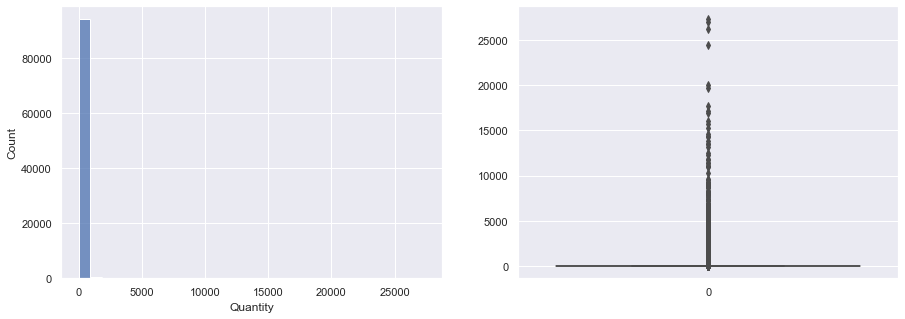

In [168]:
var = 'Quantity'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(df_corpus, x=var, bins=30, ax=ax1)
sns.boxplot(data = df_corpus[var], ax=ax2)

In [169]:
#Transformation logarithmique
df_corpus['Quantity_log'] = [log(l+1) for l in df_corpus['Quantity']]

<AxesSubplot:>

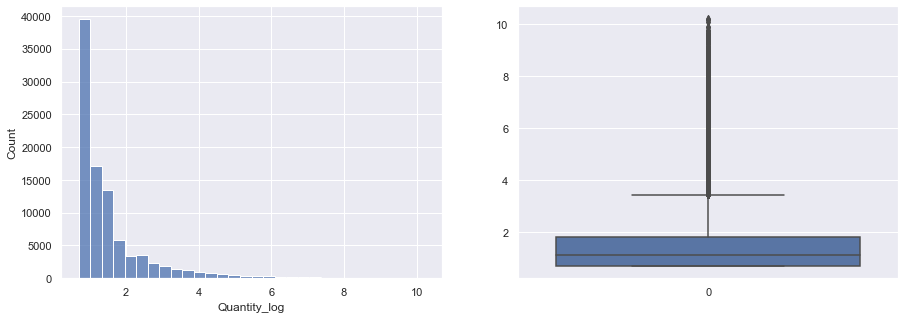

In [170]:
var = 'Quantity_log'

sns.set(rc = {'figure.figsize':(15,5)})
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(df_corpus, x=var, bins=30, ax=ax1)
sns.boxplot(data = df_corpus[var], ax=ax2)

#### Tokens les plus fréquents

In [196]:
#Je choisis d'explorer les tokens qui ont au moins 5000 occurences
freqt_tokens = df_corpus[df_corpus['Quantity']>=5000]

In [197]:
freqt_tokens.shape

(101, 4)

In [198]:
list(freqt_tokens['Token'])

['int',
 'using',
 'code',
 'text',
 'file',
 'python',
 'create',
 'app',
 'use',
 'name',
 'string',
 'function',
 'module',
 'way',
 'number',
 'set',
 'value',
 'html',
 'javascript',
 'work',
 'server',
 'get',
 'test',
 'web',
 'application',
 'list',
 'java',
 'know',
 'make',
 'item',
 'array',
 'table',
 'script',
 'system',
 'solution',
 'build',
 'data',
 'error',
 'php',
 'class',
 'method',
 'type',
 'image',
 'path',
 'version',
 'object',
 'line',
 'like',
 'main',
 'git',
 'time',
 'find',
 'page',
 'command',
 'option',
 'content',
 'change',
 'package',
 'date',
 'log',
 'new',
 'example',
 'import',
 'one',
 'need',
 'div',
 'following',
 'run',
 'null',
 'button',
 'return',
 'key',
 'view',
 'http',
 'android',
 'public',
 'url',
 'user',
 'something',
 'input',
 'could',
 'install',
 'var',
 'first',
 'project',
 'see',
 'add',
 'found',
 'layout',
 'would',
 'true',
 'com',
 'lib',
 'also',
 'problem',
 'org',
 'node',
 'want',
 'trying',
 'question',
 'tried']

[Text(0.5, 1.0, 'Répartition des effectifs pour les Tokens les plus fréquents du corpus'),
 Text(0.5, 0, 'Tokens les plus fréquents')]

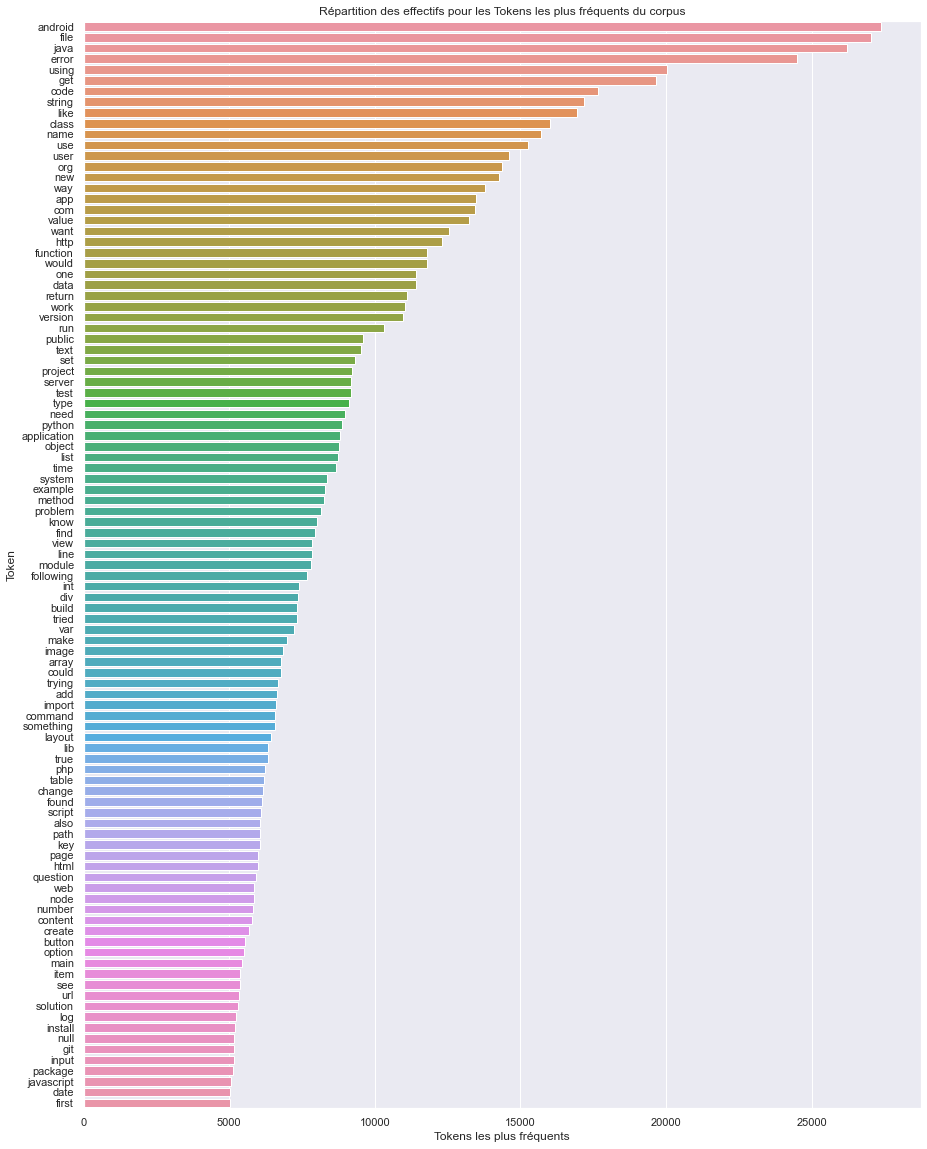

In [174]:
sns.set(rc = {'figure.figsize':(15,20)})
fig = sns.barplot(y = freqt_tokens.sort_values('Quantity', ascending = False)['Token'],
                  x = freqt_tokens.sort_values('Quantity', ascending = False)['Quantity'], orient='h')
fig.set(title ="Répartition des effectifs pour les Tokens les plus fréquents du corpus",
        xlabel="Tokens les plus fréquents")

#### Tokens les moins fréquents

In [199]:
#Je choisis d'explorer les tokens qui n'apparaissent qu'une seule fois
unique_tokens = df_corpus[df_corpus['Quantity'] == 1]

In [200]:
len(unique_tokens)

39476

In [177]:
unique_tokens.sample(20)

,Token,Quantity,percent,Quantity_log
30094,signedcookies,1,0.000029,0.693147
37411,mladenp,1,0.000029,0.693147
64538,cxxdepmode,1,0.000029,0.693147
49882,requirelowercase,1,0.000029,0.693147
83387,talkin,1,0.000029,0.693147
51586,fetchresources,1,0.000029,0.693147
68163,makandra,1,0.000029,0.693147
88987,bsmg,1,0.000029,0.693147
79715,diffindays,1,0.000029,0.693147
82641,afebecc,1,0.000029,0.693147


In [201]:
unique_tokens_percent = round(len(unique_tokens)*100/len(df_corpus))
unique_tokens_percent

42

In [189]:
#Je choisis d'explorer les tokens qui apparaissent moins de 3 fois
min_tokens = df_corpus[df_corpus['Quantity'] < 3]

In [190]:
len(min_tokens)

56557

In [191]:
min_tokens.sample(20)

,Token,Quantity,percent,Quantity_log
50277,raiserror,1,0.000029,0.693147
92225,pyhc,2,0.000059,1.098612
23019,yeahyeah,2,0.000059,1.098612
28764,nettcpbinding,2,0.000059,1.098612
36549,directry,1,0.000029,0.693147
70423,ocuments,1,0.000029,0.693147
69605,ncalculators,1,0.000029,0.693147
62073,rootless,2,0.000059,1.098612
46295,maxauthtries,2,0.000059,1.098612
64392,renderstack,2,0.000059,1.098612


In [192]:
min_tokens_percent = round(len(min_tokens)*100/len(df_corpus))
min_tokens_percent

60

#### Occurence des Tags dans le corpus 

In [208]:
Tokens_Tags = [w for w in df_corpus['Token'] if w in tags_liste]

In [209]:
len(Tokens_Tags)

2553

In [210]:
Tokens_Tags_percent = round(len(Tokens_Tags)*100/len(df_corpus))
Tokens_Tags_percent

3

#### Nettoyage du corpus pour le bag of words

In [206]:
corpus_liste = list(df_corpus['Token'])

In [204]:
min_tokens_liste = list(min_tokens['Token'])

In [207]:
print(len(corpus_liste))
corpus_c = [t for t in corpus_liste if t not in min_tokens_liste]
print(len(corpus_c))

94910
38353


### df_bow maj

In [211]:
df_bow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43079 entries, 0 to 43078
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           43079 non-null  object
 1   Body            43079 non-null  object
 2   Tags_split      43079 non-null  object
 3   Title_split     43079 non-null  object
 4   Body_split      43079 non-null  object
 5   Title_not_Tags  43079 non-null  object
 6   Title_Tags      43079 non-null  object
 7   Body_not_Tags   43079 non-null  object
 8   Body_Tags       43079 non-null  object
 9   Title_tok       43079 non-null  object
 10  Body_tok        43079 non-null  object
 11  Title_tok_f     43079 non-null  object
 12  Body_tok_f      43079 non-null  object
 13  Title_tok_lem   43079 non-null  object
 14  Body_tok_lem    43079 non-null  object
 15  Title_tt        43079 non-null  object
 16  Body_tt         43079 non-null  object
dtypes: object(17)
memory usage: 5.6+ MB


In [212]:
df_bow_features = df_bow[['Title_tt', 'Body_tt', 'Tags_split']]

In [213]:
df_bow_features.head()

,Title_tt,Body_tt,Tags_split
0,"[vuetify, icon, showing]","[vuetify, want, icon, working, expected, rende...","[vue.js, icons, vuetify.js]"
1,"[long, long, printf, format, unsigned, int, us...","[include, stdio, main, long, long, num, fyi, f...","[c, syntax, printf, format-specifiers, long-long]"
2,"[choosing, code, analysis, tool, static]","[working, coding, environment, tool, check, so...","[c, unix, testing]"
3,"[besides, text, editor, linux]","[let, preface, question, saying, use, mac, osx...","[linux, editor]"
4,"[syntaxerror, non, ascii, file, python, charac...","[writing, code, receiving, error, title, searc...",[python]
